# 中等项目1：多分类模型评估系统

## 学习目标
- 理解多分类问题的评估指标
- 掌握宏平均、微平均、加权平均的区别
- 使用scikit-learn进行多分类评估
- 可视化多分类模型的评估结果
- 进行多分类模型的交叉验证


In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_curve, auc,
                            roc_auc_score)
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 设置中文字体和样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
np.random.seed(42)

print("环境准备完成！")


环境准备完成！


## 1. 数据准备

使用Iris数据集（3分类问题）


In [2]:
# 加载Iris数据集
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("数据信息")
print("=" * 60)
print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")
print(f"特征数: {X.shape[1]}")
print(f"类别数: {len(np.unique(y))}")
print(f"类别名称: {iris.target_names}")
print(f"类别分布（训练集）: {np.bincount(y_train)}")
print(f"类别分布（测试集）: {np.bincount(y_test)}")


数据信息
训练集样本数: 120
测试集样本数: 30
特征数: 4
类别数: 3
类别名称: ['setosa' 'versicolor' 'virginica']
类别分布（训练集）: [40 40 40]
类别分布（测试集）: [10 10 10]


## 2. 训练多个多分类模型


In [3]:
# 创建模型字典
models = {
    '逻辑回归': LogisticRegression(random_state=42, max_iter=1000),
    '决策树': DecisionTreeClassifier(random_state=42),
    '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# 训练模型
trained_models = {}
print("=" * 60)
print("训练模型")
print("=" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✓ {name} 训练完成")


训练模型
✓ 逻辑回归 训练完成
✓ 决策树 训练完成
✓ 随机森林 训练完成
✓ SVM 训练完成


## 3. 计算多分类评估指标

多分类评估指标包括：
- **准确率（Accuracy）**：整体分类正确率
- **宏平均（Macro Average）**：每个类别的指标平均值
- **微平均（Micro Average）**：所有样本的指标平均值
- **加权平均（Weighted Average）**：按类别样本数加权的平均值


In [4]:
# 评估每个模型
results = {}

print("=" * 60)
print("多分类模型评估结果")
print("=" * 60)

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_micro = precision_score(y_test, y_pred, average='micro')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    
    recall_macro = recall_score(y_test, y_pred, average='macro')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'precision_micro': precision_micro,
        'precision_weighted': precision_weighted,
        'recall_macro': recall_macro,
        'recall_micro': recall_micro,
        'recall_weighted': recall_weighted,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'f1_weighted': f1_weighted,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{name}:")
    print(f"  准确率: {accuracy:.4f}")
    print(f"  精确率 - 宏平均: {precision_macro:.4f}, 微平均: {precision_micro:.4f}, 加权平均: {precision_weighted:.4f}")
    print(f"  召回率 - 宏平均: {recall_macro:.4f}, 微平均: {recall_micro:.4f}, 加权平均: {recall_weighted:.4f}")
    print(f"  F1分数 - 宏平均: {f1_macro:.4f}, 微平均: {f1_micro:.4f}, 加权平均: {f1_weighted:.4f}")

# 创建评估指标对比表
df_results = pd.DataFrame({
    name: {
        '准确率': f"{results[name]['accuracy']:.4f}",
        '精确率(宏)': f"{results[name]['precision_macro']:.4f}",
        '召回率(宏)': f"{results[name]['recall_macro']:.4f}",
        'F1(宏)': f"{results[name]['f1_macro']:.4f}"
    }
    for name in results.keys()
}).T

print("\n" + "=" * 60)
print("评估指标对比表（宏平均）")
print("=" * 60)
print(df_results)


多分类模型评估结果

逻辑回归:
  准确率: 0.9667
  精确率 - 宏平均: 0.9697, 微平均: 0.9667, 加权平均: 0.9697
  召回率 - 宏平均: 0.9667, 微平均: 0.9667, 加权平均: 0.9667
  F1分数 - 宏平均: 0.9666, 微平均: 0.9667, 加权平均: 0.9666

决策树:
  准确率: 0.9333
  精确率 - 宏平均: 0.9333, 微平均: 0.9333, 加权平均: 0.9333
  召回率 - 宏平均: 0.9333, 微平均: 0.9333, 加权平均: 0.9333
  F1分数 - 宏平均: 0.9333, 微平均: 0.9333, 加权平均: 0.9333

随机森林:
  准确率: 0.9000
  精确率 - 宏平均: 0.9024, 微平均: 0.9000, 加权平均: 0.9024
  召回率 - 宏平均: 0.9000, 微平均: 0.9000, 加权平均: 0.9000
  F1分数 - 宏平均: 0.8997, 微平均: 0.9000, 加权平均: 0.8997

SVM:
  准确率: 0.9667
  精确率 - 宏平均: 0.9697, 微平均: 0.9667, 加权平均: 0.9697
  召回率 - 宏平均: 0.9667, 微平均: 0.9667, 加权平均: 0.9667
  F1分数 - 宏平均: 0.9666, 微平均: 0.9667, 加权平均: 0.9666

评估指标对比表（宏平均）
         准确率  精确率(宏)  召回率(宏)   F1(宏)
逻辑回归  0.9667  0.9697  0.9667  0.9666
决策树   0.9333  0.9333  0.9333  0.9333
随机森林  0.9000  0.9024  0.9000  0.8997
SVM   0.9667  0.9697  0.9667  0.9666


C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_41736\1665630002.py:71: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E})

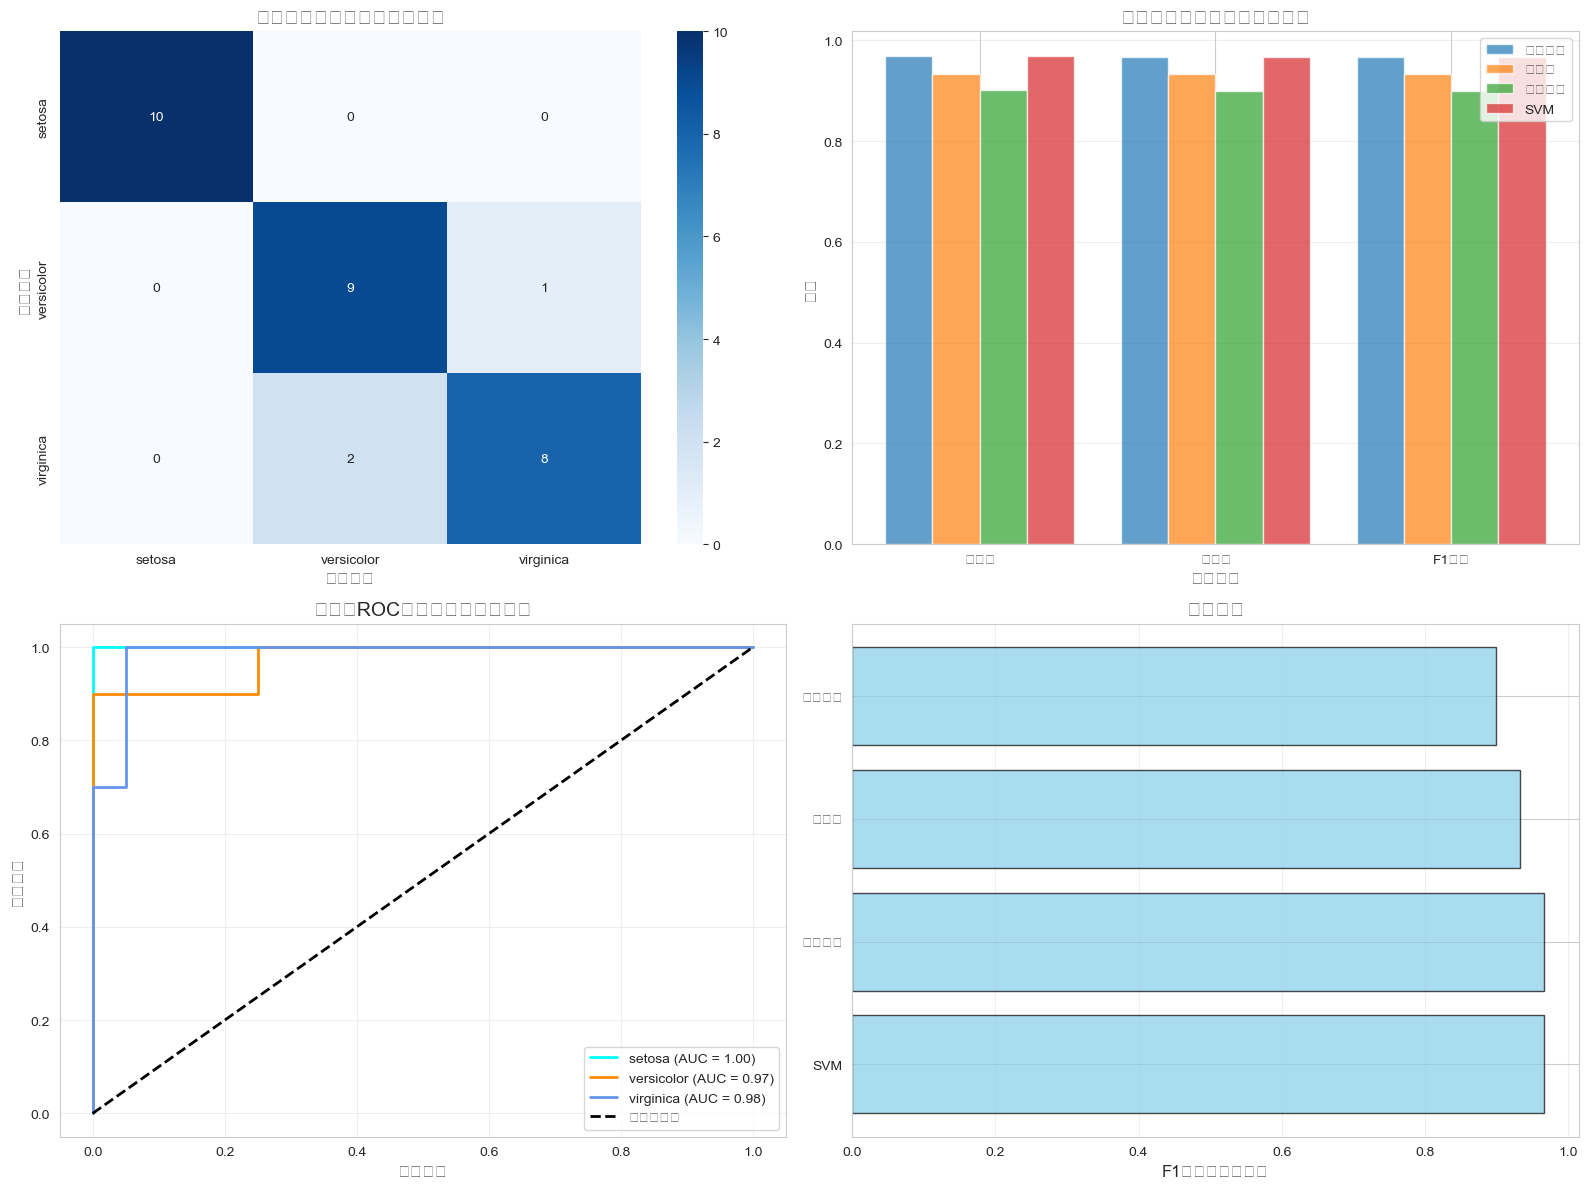

In [5]:
# 创建可视化图表
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 左上：混淆矩阵热力图（随机森林）
ax1 = axes[0, 0]
cm = results['随机森林']['confusion_matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
ax1.set_xlabel('预测标签', fontsize=12)
ax1.set_ylabel('真实标签', fontsize=12)
ax1.set_title('混淆矩阵热力图（随机森林）', fontsize=14)

# 右上：评估指标对比（宏平均）
ax2 = axes[0, 1]
metrics = ['精确率', '召回率', 'F1分数']
x = np.arange(len(metrics))
width = 0.2

for i, (name, result) in enumerate(results.items()):
    values = [result['precision_macro'], result['recall_macro'], result['f1_macro']]
    ax2.bar(x + i * width, values, width, label=name, alpha=0.7)

ax2.set_xlabel('评估指标', fontsize=12)
ax2.set_ylabel('分数', fontsize=12)
ax2.set_title('模型评估指标对比（宏平均）', fontsize=14)
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, axis='y', alpha=0.3)

# 左下：多类别ROC曲线（随机森林）
ax3 = axes[1, 0]
n_classes = len(iris.target_names)
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_pred_proba = results['随机森林']['y_pred_proba']

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax3.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{iris.target_names[i]} (AUC = {roc_auc[i]:.2f})')

ax3.plot([0, 1], [0, 1], 'k--', lw=2, label='随机分类器')
ax3.set_xlabel('假正例率', fontsize=12)
ax3.set_ylabel('真正例率', fontsize=12)
ax3.set_title('多类别ROC曲线（一对多策略）', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 右下：模型排名（按F1宏平均）
ax4 = axes[1, 1]
model_names = list(results.keys())
f1_scores = [results[name]['f1_macro'] for name in model_names]
sorted_indices = np.argsort(f1_scores)[::-1]

ax4.barh(range(len(model_names)), [f1_scores[i] for i in sorted_indices],
         alpha=0.7, color='skyblue', edgecolor='black')
ax4.set_yticks(range(len(model_names)))
ax4.set_yticklabels([model_names[i] for i in sorted_indices])
ax4.set_xlabel('F1分数（宏平均）', fontsize=12)
ax4.set_title('模型排名', fontsize=14)
ax4.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('multiclass_evaluation_results.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
# 生成详细分类报告（随机森林）
print("=" * 60)
print("详细分类报告（随机森林）")
print("=" * 60)
print(classification_report(y_test, results['随机森林']['y_pred'],
                          target_names=iris.target_names))


详细分类报告（随机森林）
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

